In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf

In [2]:
#importing last one year data for stock for example: AMZN, from yahoo finance using yfinance library

df = yf.download('AMZN', period='1y').reset_index()

[*********************100%***********************]  1 of 1 completed


In [3]:
# converting all values in between 0 and 1 using MinMaxScaler function

from sklearn.preprocessing import MinMaxScaler

In [4]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [5]:
data = df.filter(['Adj Close']).values

In [6]:
data_scaled = scaler.fit_transform(data)

In [7]:
data_scaled

array([[0.0669546 ],
       [0.05660326],
       [0.05032778],
       [0.04533003],
       [0.03443423],
       [0.04042936],
       [0.0393026 ],
       [0.03374953],
       [0.03887666],
       [0.04513595],
       [0.04546482],
       [0.04992343],
       [0.06148781],
       [0.05791338],
       [0.0623612 ],
       [0.05924501],
       [0.06274936],
       [0.06070603],
       [0.10359925],
       [0.10415457],
       [0.09180308],
       [0.09231523],
       [0.11936341],
       [0.10694183],
       [0.12198897],
       [0.1241347 ],
       [0.11610704],
       [0.12100239],
       [0.11135734],
       [0.11574587],
       [0.10396043],
       [0.09996012],
       [0.10854303],
       [0.10141575],
       [0.11612323],
       [0.11367556],
       [0.11212286],
       [0.09975525],
       [0.08180219],
       [0.09523194],
       [0.09779281],
       [0.10462901],
       [0.17905048],
       [0.1766136 ],
       [0.20112783],
       [0.19584439],
       [0.20142977],
       [0.217

In [8]:
data

array([[1800.80004883],
       [1781.59997559],
       [1769.95996094],
       [1760.68994141],
       [1740.47998047],
       [1751.59997559],
       [1749.51000977],
       [1739.20996094],
       [1748.7199707 ],
       [1760.32995605],
       [1760.93994141],
       [1769.20996094],
       [1790.66003418],
       [1784.0300293 ],
       [1792.2800293 ],
       [1786.5       ],
       [1793.        ],
       [1789.20996094],
       [1868.77001953],
       [1869.80004883],
       [1846.89001465],
       [1847.83996582],
       [1898.01000977],
       [1874.9699707 ],
       [1902.88000488],
       [1906.85998535],
       [1891.9699707 ],
       [1901.05004883],
       [1883.16003418],
       [1891.30004883],
       [1869.43994141],
       [1862.02001953],
       [1877.93994141],
       [1864.7199707 ],
       [1892.        ],
       [1887.45996094],
       [1884.57995605],
       [1861.64001465],
       [1828.33996582],
       [1853.25      ],
       [1858.        ],
       [1870.680

In [9]:
x = []
y = []

In [10]:
# using following loop we are separating data into x and y. 
#We put the array's of each 60 values as features and 61th values as target and moving on like that on all over the data.

for i in range(60, len(data)):
    x.append(data_scaled[i-60:i, 0])
    y.append(data_scaled[i, 0])

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [13]:
# training model with LinearRegression

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

0.9491300759538682

In [14]:
# training model with KNeighborsRegressor

from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=10)
knr.fit(x_train, y_train)
knr.score(x_test, y_test)

0.9767574167146983

In [15]:
# by comparing both model choosing most accurate one i.e. KNeighborsRegressor.
# After model selection predicting upcoming 30 days adj close price for stock.

for i in range(30):
    pred = scaler.inverse_transform([knr.predict([scaler.fit_transform(data[-60:]).ravel()])])
    data = np.vstack([data, pred])

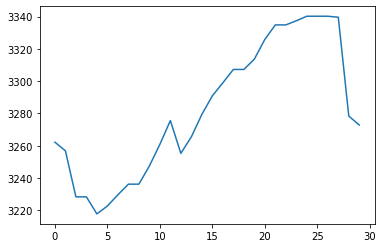

In [16]:
#ploting behaviar of adj closing price of stock for next 30 day's

sns.lineplot([i for i in range(30)], data[-30:].ravel())

In [17]:
data[-30:]

array([[3262.22062392],
       [3256.85372737],
       [3228.36455968],
       [3228.36455968],
       [3217.80597418],
       [3222.7104621 ],
       [3229.65140962],
       [3236.22058533],
       [3236.22058533],
       [3247.47476504],
       [3260.84971781],
       [3275.59347554],
       [3255.29713016],
       [3265.51620264],
       [3279.3888114 ],
       [3290.89955483],
       [3298.93965299],
       [3307.21674705],
       [3307.21674705],
       [3313.58792605],
       [3325.81558196],
       [3334.79987191],
       [3334.79987191],
       [3337.35331914],
       [3340.16151343],
       [3340.16151343],
       [3340.16151343],
       [3339.54830436],
       [3278.37782907],
       [3272.81038619]])